# Matching sources from two catalogs by RA and Dec

### Importing the necessary packages

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast
from astropy import units as u
import astropy.table
from astropy.table import QTable

### Opening the FITS files

In [50]:
# Opening the fits files
from astropy.io import fits
hdulistPC = fits.open('PRIMER-COSMOS_v2.0.0_LW_Kf444w_SUPER_CATALOG.fits')
hdulistPU = fits.open('PRIMER-UDS_v2.0.0_LW_Kf444w_SUPER_CATALOG.fits')
hdulistC = fits.open('cos_merged_v1.1.fits')
hdulistU = fits.open('uds_merged_v1.1.fits')
hdulistPUF = fits.open('PRIMER-UDS_v2.0.0_catalog.fits')


### Grabbing the RA and DEC values

In [51]:
#Grabbing the RA and DEC values from the fits files using the headers
ra_pc = hdulistPC[1].data['ra']
ra_pu = hdulistPU[1].data['ra']
ra_c = hdulistC[1].data['RA']
ra_u = hdulistU[1].data['RA']

dec_pc = hdulistPC[1].data['dec']
dec_pu = hdulistPU[1].data['dec']
dec_c = hdulistC[1].data['DEC']
dec_u = hdulistU[1].data['DEC']

#Using QTable to create a table with the RA and DEC values to double check with TOPCAT
t = QTable([ra_pc , dec_pc], names=('RA', 'DEC'))
t1 = QTable([ra_pu, dec_pu], names=('RA', 'DEC'))
t2 = QTable([ra_c, dec_c], names=('RA', 'DEC'))
t3 = QTable([ra_u, dec_u], names=('RA', 'DEC'))

In [52]:
#Remove # to print out desired table
#t
#t1
#t2
#t3

## PSF Value

In [53]:
PSF = 0.1

### IGNORE: This is just for me just something to look at because I was curious about this spread

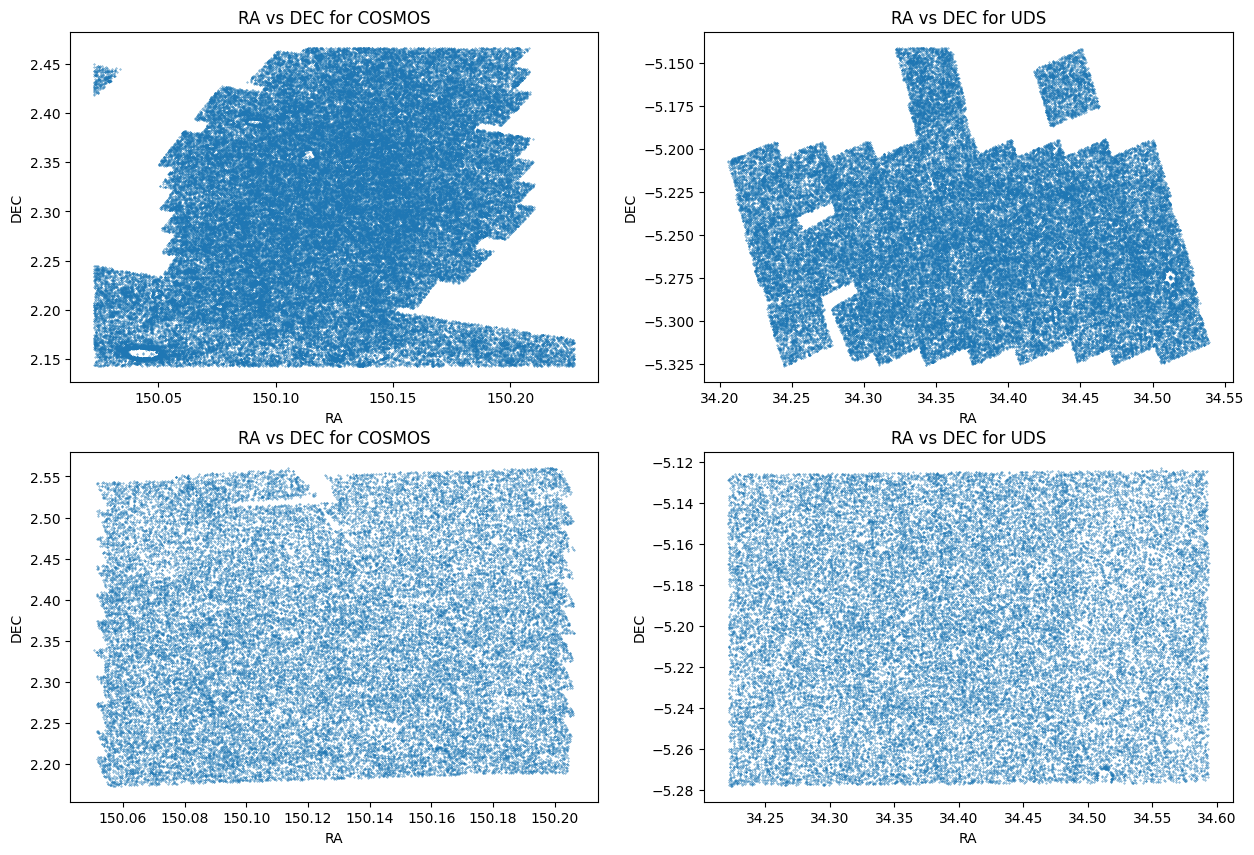

In [54]:
# Plotting the RA and DEC in different plots
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(ra_pc,dec_pc,s=0.1)
plt.title('RA vs DEC for COSMOS')
plt.xlabel('RA')
plt.ylabel('DEC')

plt.subplot(2,2,2)
plt.scatter(ra_pu,dec_pu,s=0.1)
plt.title('RA vs DEC for UDS')
plt.xlabel('RA')
plt.ylabel('DEC')

plt.subplot(2,2,3)
plt.scatter(ra_c,dec_c,s=0.1)
plt.title('RA vs DEC for COSMOS')
plt.xlabel('RA')
plt.ylabel('DEC')

plt.subplot(2,2,4)
plt.scatter(ra_u,dec_u,s=0.1)
plt.title('RA vs DEC for UDS')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

### Now we start matching the cataloges!

# Start by checking the COSMOS RA and then do the same for DEC

In [55]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('RA', 'DEC'))
rejected_table = QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(ra_pc)):
    for j in range(len(ra_c)):
        if abs(ra_pc[i] - ra_c[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([ra_pc[i], dec_pc[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([ra_pc[i], dec_pc[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))


Matching sources:
116247

Rejected sources:
0


In [56]:
# Create empty tables for matching and rejected sources
matching_table1 = QTable(names=('RA', 'DEC'))
rejected_table1= QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(dec_pc)):
    for j in range(len(dec_c)):
        if abs(ra_pc[i] - ra_c[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table1.add_row([dec_pc[i], dec_pc[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table1.add_row([ra_pc[i], dec_pc[i]])
        
# Print the matching and rejected tables. The length should be how many sources are in each table
print('Matching sources:')
print(len(matching_table1))
print('\nRejected sources:')
print(len(rejected_table1))

Matching sources:
116247

Rejected sources:
0


### Now I'm doing the same with the UDS

In [57]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('RA', 'DEC'))
rejected_table = QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(ra_pu)):
    for j in range(len(ra_u)):
        if abs(ra_pu[i] - ra_u[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([ra_pu[i], dec_pu[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([ra_pu[i], dec_pu[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))

Matching sources:
78275

Rejected sources:
0


In [58]:
# Create empty tables for matching and rejected sources
matching_table = QTable(names=('RA', 'DEC'))
rejected_table = QTable(names=('RA', 'DEC'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(dec_pu)):
    for j in range(len(dec_u)):
        if abs(dec_pu[i] - dec_u[j]) <= PSF:
            # Add to matching table if within PSF
            matching_table.add_row([ra_pu[i], dec_pu[i]])
            break
    else:
        # Add to rejected table if not within PSF
        rejected_table.add_row([ra_pu[i], dec_pu[i]])
        
# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))

Matching sources:
78275

Rejected sources:
0


### All of these values fall within the PSF threshold. Since the PRIMER catalog has a larger number of stars, it can only run up to the number of stars in merged catalogs. In the end they all fell within the PSF threshold

## Now we have to check how the photometric values compare and then plot thier redshifts. First I need to grab the photometric values from the cataloges and append them to the PRIMER catalog

## Grabbing the ZPHOTE values

In [59]:
zphot_p = hdulistPUF[1].data['z_phot']
zphot_c = hdulistC[1].data['zphot']
zphot_u = hdulistU[1].data['zphot']

#Making QTables for the zphot values
zphot_p_table = QTable([zphot_p], names=('z_phot',))
zphot_c_table = QTable([zphot_c], names=('z_phot',))
zphot_u_table = QTable([zphot_u], names=('z_phot',))

#Printing the QTables
#zphote_p_table
#zphote_c_table
#zphote_u_table


In [60]:
Chi2 = 1

In [63]:
#Now I want to compare the zphot values

# Create empty tables for matching and rejected sources
matching_table = QTable(names=('z_phot', 'ra_pc', 'dec_pc'))
rejected_table = QTable(names=('z_phot', 'ra_pc', 'dec_pc'))

# Loop through RA_PC and RA_C to find matches
for i in range(len(zphot_p)):
    for j in range(len(zphot_u)):
        if abs(zphot_p[i] - zphot_u[j]) <= Chi2:
            # Add to matching table if within PSF
            matching_table.add_row([zphot_p[i], ra_pc[i], dec_pc[i]])
            break
    else:
        # Add to rejected table if not within PSF
         rejected_table.add_row([zphot_p[i], ra_pc[i], dec_pc[i]])

# Print the matching and rejected tables. The length should be how many match
print('Matching sources:')
print(len(matching_table))
print('\nRejected sources:')
print(len(rejected_table))



Matching sources:
72327

Rejected sources:
5948


In [ ]:
t4 = QTable([matching_table])
#t4
t5 = QTable([rejected_table])
#t5

## Now lets plot the redshifts

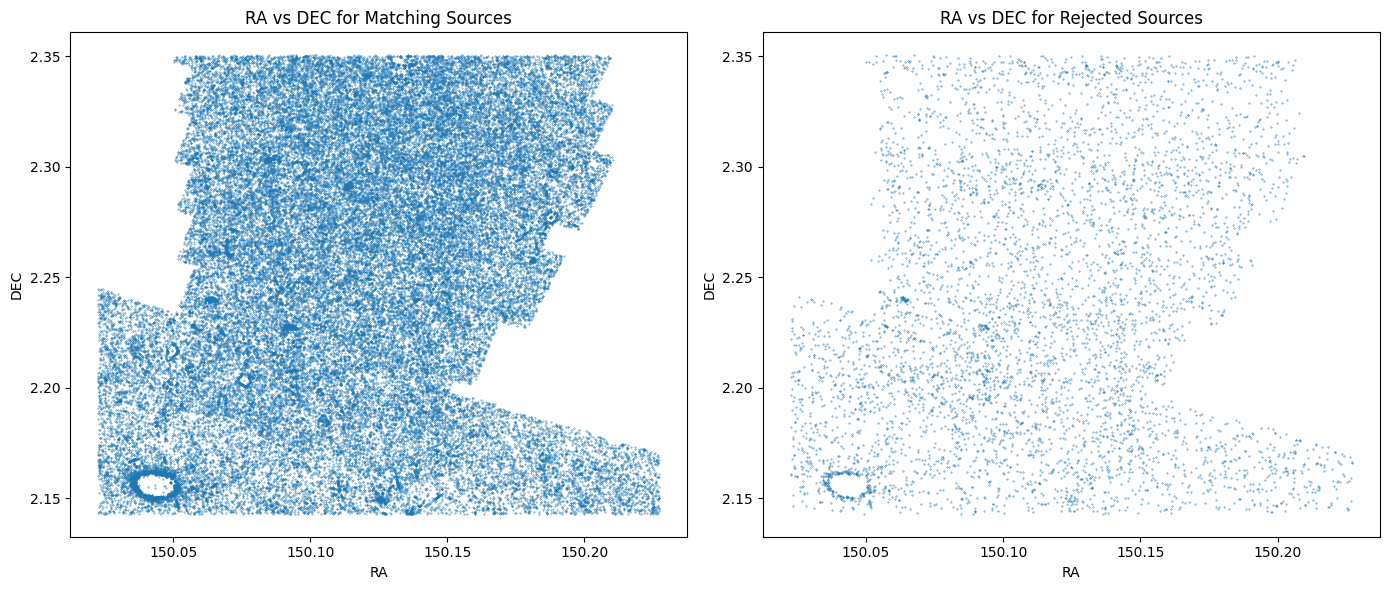

In [72]:
ra_matching = matching_table['ra_pc']
dec_matching = matching_table['dec_pc']

ra_rejected = rejected_table['ra_pc']
dec_rejected = rejected_table['dec_pc']

# Setup the figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns

# Plot for matching sources
axs[0].scatter(ra_matching, dec_matching, s=0.1)
axs[0].set_title('RA vs DEC for Matching Sources')
axs[0].set_xlabel('RA')
axs[0].set_ylabel('DEC')

# Plot for rejected sources
axs[1].scatter(ra_rejected, dec_rejected, s=0.1)
axs[1].set_title('RA vs DEC for Rejected Sources')
axs[1].set_xlabel('RA')
axs[1].set_ylabel('DEC')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


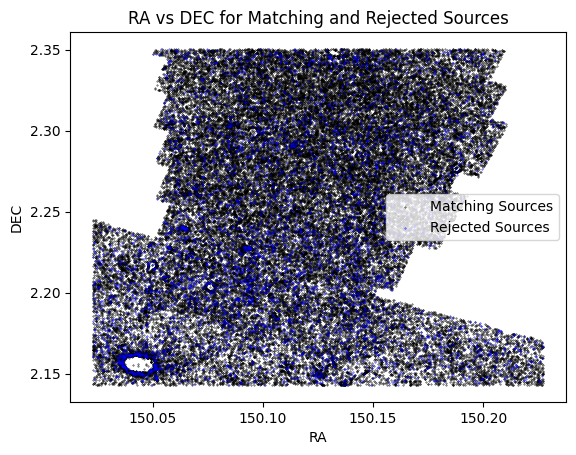

In [73]:
# Extract RA and Dec values from the matching and rejected tables
ra_matching = matching_table['ra_pc']
dec_matching = matching_table['dec_pc']
ra_rejected = rejected_table['ra_pc']
dec_rejected = rejected_table['dec_pc']

# Plot the matching and rejected sources
plt.scatter(ra_matching, dec_matching, color='black', label='Matching Sources', s=0.1)
plt.scatter(ra_rejected, dec_rejected, color='blue', label='Rejected Sources', s=0.1)

# Set the plot title and labels
plt.title('RA vs DEC for Matching and Rejected Sources')
plt.xlabel('RA')
plt.ylabel('DEC')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Finally append the M-Med header to the PRIMER catalog 

In [ ]:
# Grab the m-med header from hdulistPUF
header_m_med = hdulistPUF[1].header['m-med']

# Append the header to hdulistPU
hdulistPU.append(header_m_med)

# Append the header to hdulistPC
hdulistPC.append(header_m_med)